# Loan Prediction based on customer behaviour
## Which variables can best determine predict whether a person is going to default a loan?

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [3]:
riskData = pd.read_csv('Training Data.csv')
riskData.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
riskData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


There are 13 variables and 252000 observations in the dataset.
The response variable is 'Risk_Flag', while the remaining 12 are most likely predictors.     
There are '7' variables identified as 'int64' by default, and upon further inspection, it is most likely Numeric.     
There are '6' variables identified as 'object by default, and upon further inspection, it is most likely Categorical.      
None of the variables have any missing value after checking info.

### Data Preparation and Cleaning

First we analyse the numeric predictors

In [5]:
riskData[['Id','Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']].describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000


For income, it seems that it is the value multiplied by 10^(num at the end).
For age, it seems to be in the correct scale from >=21-79 which makes sense for anyone trying to get a loan.
For experience, min is 0 while max is 20 as the person may be a student who has not started working.
For current_job_years, min is 0 and max is 14, which shows that some people have been at the company for many years.
For current_house_years, min is 10 and max is 14.

Next, we analyse the categorical variables.

In [6]:
riskData[['Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE']].describe()

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
count,252000,252000,252000,252000,252000,252000
unique,2,3,2,51,317,29
top,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh
freq,226272,231898,176000,5957,1259,28400


For Married/Single, there are 2 levels with majority of them being single
For House_Ownership, there are 3 levels with rented as the highest frequency
For Car_Ownership, there are 2 levels with majority not having a car
For Profession, there are 51 levels with Physician being the majority, likely because of medical school
For CITY, there are 317 levels with Vijayanagaram being the highest frequency
For STATE, there are 29 levels with Uttar_Pradesh being the highest frequency

### Drop ID column because it is simply the index

In [11]:
riskData.drop(columns = 'Id')

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


### need to store into new DataFrame if want to drop
### maybe can do nunique to justify data cleaning to check that there are only certain type of values
### changing risk flag, car ownership, single/married to int since it is just 0 and 1, currently it is a string

### EDA
### need to type out what we observe for each of the variables
### should we use all variables or remove some

We first start by exploring response variable `Risk_Flag`, the one we are supposed to predict at the end of the day.

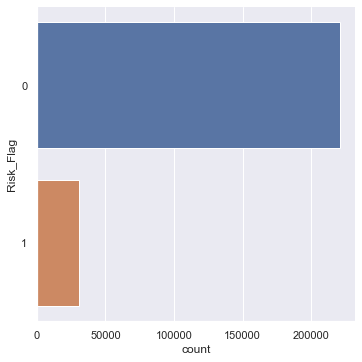

In [12]:
sb.catplot(y = 'Risk_Flag', data = riskData, kind = "count")

0 means that the person did not default on the loan, 1 means that the person defaulted on the loan.

In [13]:
count0, count1 = riskData['Risk_Flag'].value_counts()
print("Ratio of classes (0:1) = ",count0, ":", count1)

Ratio of classes (0:1) =  221004 : 30996


There is a large class imbalance in the Response variable.
We will need to fix this later on.

Separating the numeric and categorical predictors as standard functions behave differently for them.

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000


Then we analyse the categorical predictors

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
count,252000,252000,252000,252000,252000,252000
unique,2,3,2,51,317,29
top,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh
freq,226272,231898,176000,5957,1259,28400


### Predictors corresponding to Risk Flag
### Univariate Visualisation

<AxesSubplot:xlabel='Income', ylabel='Count'>

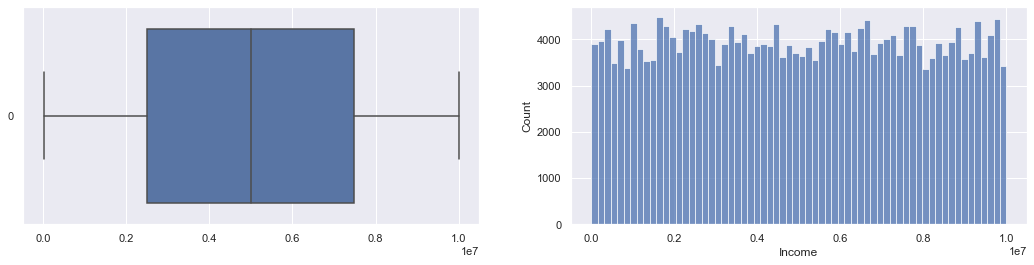

In [16]:
#income
f, axes = plt.subplots(1,2, figsize = (18,4))
sb.boxplot(data = riskData['Income'],orient = "h",ax= axes[0])
sb.histplot(data= riskData['Income'],ax = axes [1])

What can you observe from the distribution of Income?

<AxesSubplot:xlabel='Age', ylabel='Count'>

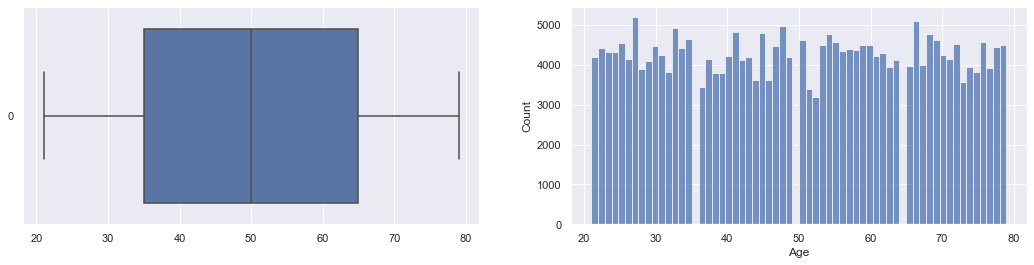

In [17]:
#age
f, axes = plt.subplots(1,2, figsize = (18,4))
sb.boxplot(data = riskData['Age'],orient = "h",ax= axes[0])
sb.histplot(data= riskData['Age'],ax = axes [1])

<AxesSubplot:xlabel='Experience', ylabel='Count'>

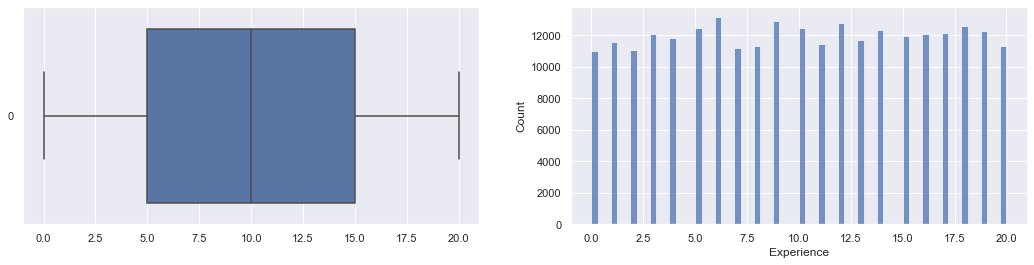

In [18]:
#experience
f, axes = plt.subplots(1,2, figsize = (18,4))
sb.boxplot(data = riskData['Experience'],orient = "h",ax= axes[0])
sb.histplot(data= riskData['Experience'],ax = axes [1])

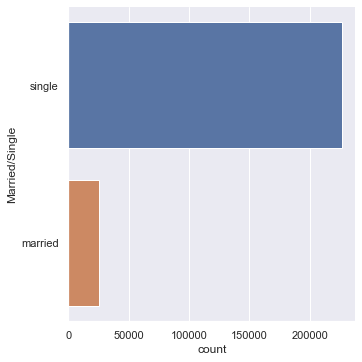

In [19]:
#Married/Single
sb.catplot(y='Married/Single',data = riskData, kind = "count")

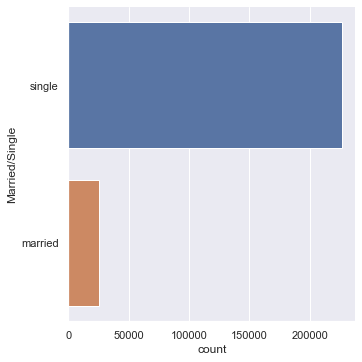

In [20]:
#Married/Single
sb.catplot(y='Married/Single',data = riskData, kind = "count")

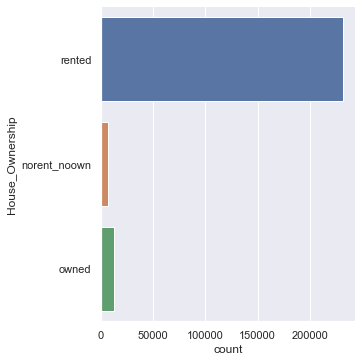

In [21]:
#House_Ownership
sb.catplot(y='House_Ownership',data = riskData, kind = "count")

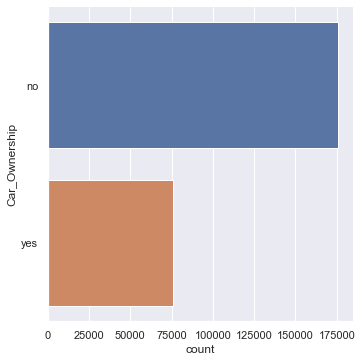

In [22]:
#Car_Ownership
sb.catplot(y='Car_Ownership',data = riskData, kind = "count")

#Profession

#need think of a way to represent
#should we categorise the various professions into broad categories?
### maybe narrow down to top 3 professions?

#city & state also cuz got too many cities and states alrd
### maybe finding patterns like the movie tagline video where they show which states/city default the most

<AxesSubplot:xlabel='CURRENT_JOB_YRS', ylabel='Count'>

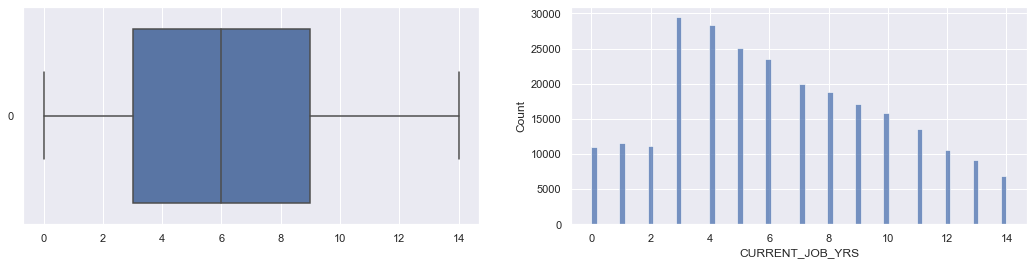

In [25]:
#CURRENT_JOB_YRS
f, axes = plt.subplots(1,2, figsize = (18,4))
sb.boxplot(data = riskData['CURRENT_JOB_YRS'],orient = "h",ax= axes[0])
sb.histplot(data= riskData['CURRENT_JOB_YRS'],ax = axes [1])

<AxesSubplot:xlabel='CURRENT_HOUSE_YRS', ylabel='Count'>

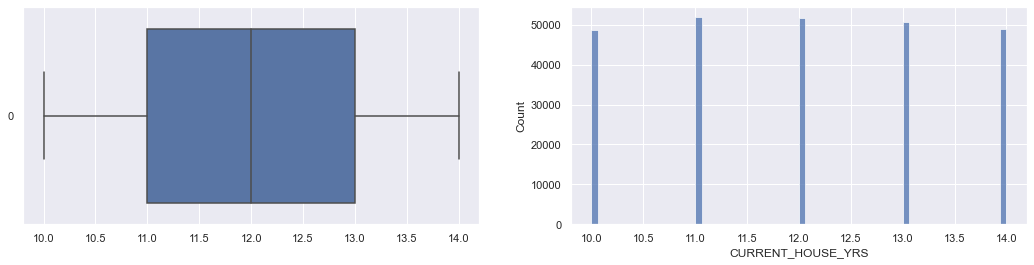

In [26]:
#CURRENT_HOUSE_YRS
f, axes = plt.subplots(1,2, figsize = (18,4))
sb.boxplot(data = riskData['CURRENT_HOUSE_YRS'],orient = "h",ax= axes[0])
sb.histplot(data= riskData['CURRENT_HOUSE_YRS'],ax = axes [1])

### Relationship with Risk_Flag
### Bivariate Visualisation

In [ ]:
#income and riskFlag
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Income', y = 'Risk_Flag', data = riskData)

<AxesSubplot:xlabel='Age', ylabel='Risk_Flag'>

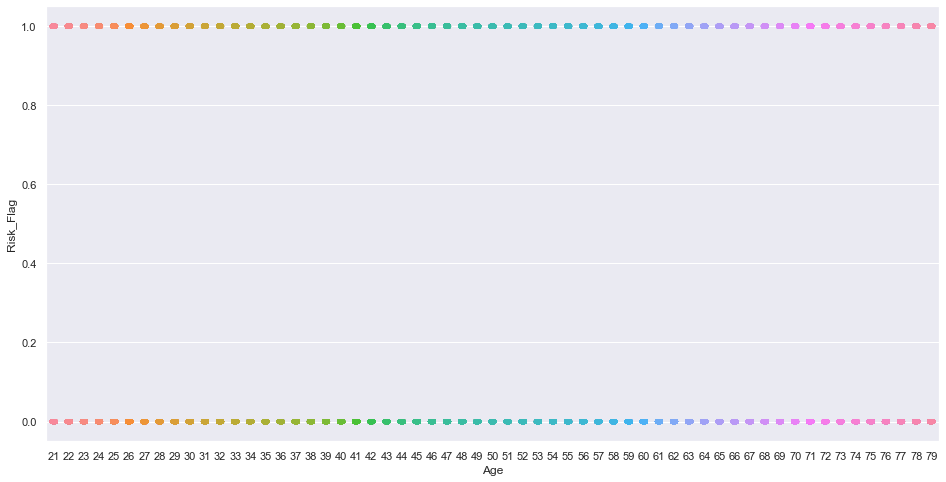

In [30]:
#age and riskFlag
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Age', y = 'Risk_Flag', data = riskData)

<AxesSubplot:xlabel='Experience', ylabel='Risk_Flag'>

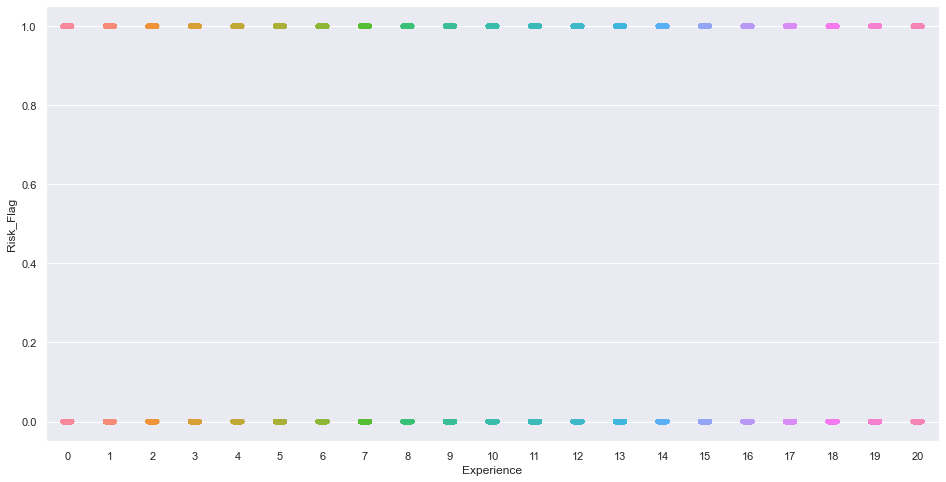

In [31]:
#age and riskFlag
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Experience', y = 'Risk_Flag', data = riskData)

<AxesSubplot:xlabel='Married/Single', ylabel='Risk_Flag'>

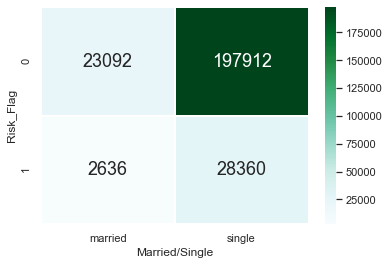

In [33]:
#marital status and riskFlag
f = plt.figure(figsize=(6, 4))
sb.heatmap(riskData.groupby(['Risk_Flag', 'Married/Single']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

### House Ownership got 3 vairables should we still do this

<AxesSubplot:xlabel='House_Ownership', ylabel='Risk_Flag'>

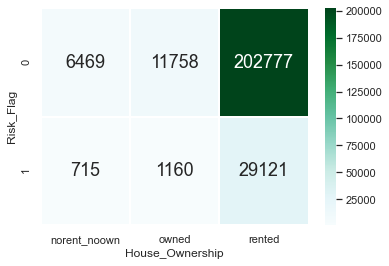

In [34]:
#House_Ownership and riskFlag
f = plt.figure(figsize=(6, 4))
sb.heatmap(riskData.groupby(['Risk_Flag', 'House_Ownership']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<AxesSubplot:xlabel='Car_Ownership', ylabel='Risk_Flag'>

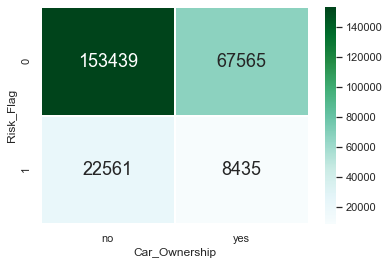

In [35]:
#Car_Ownership and riskFlag
f = plt.figure(figsize=(6, 4))
sb.heatmap(riskData.groupby(['Risk_Flag', 'Car_Ownership']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<AxesSubplot:xlabel='CURRENT_JOB_YRS', ylabel='Risk_Flag'>

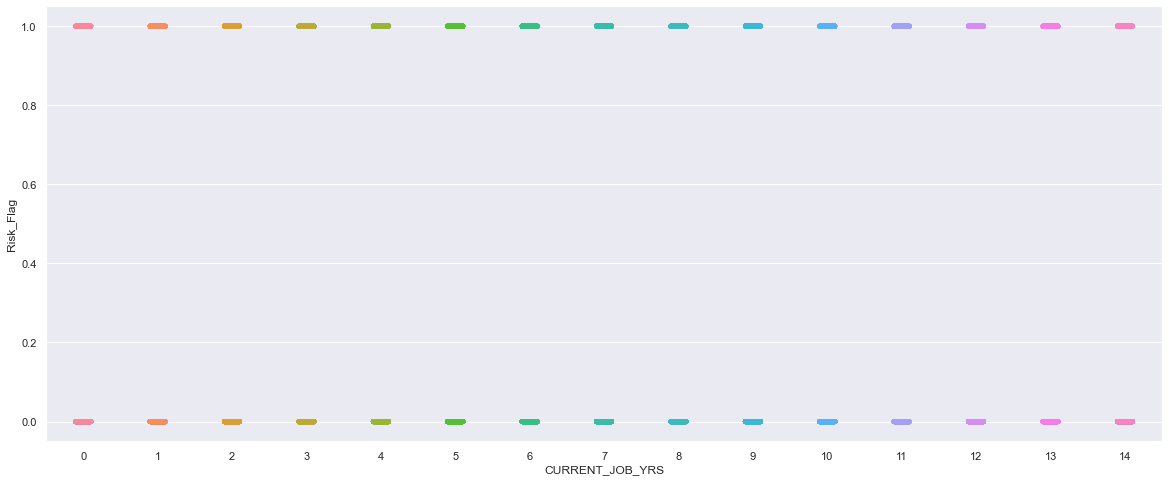

In [38]:
#CURRENT_JOB_YEARS and riskFlag
f = plt.figure(figsize=(20, 8))
sb.stripplot(x = 'CURRENT_JOB_YRS', y = 'Risk_Flag', data = riskData)

<AxesSubplot:xlabel='CURRENT_HOUSE_YRS', ylabel='Risk_Flag'>

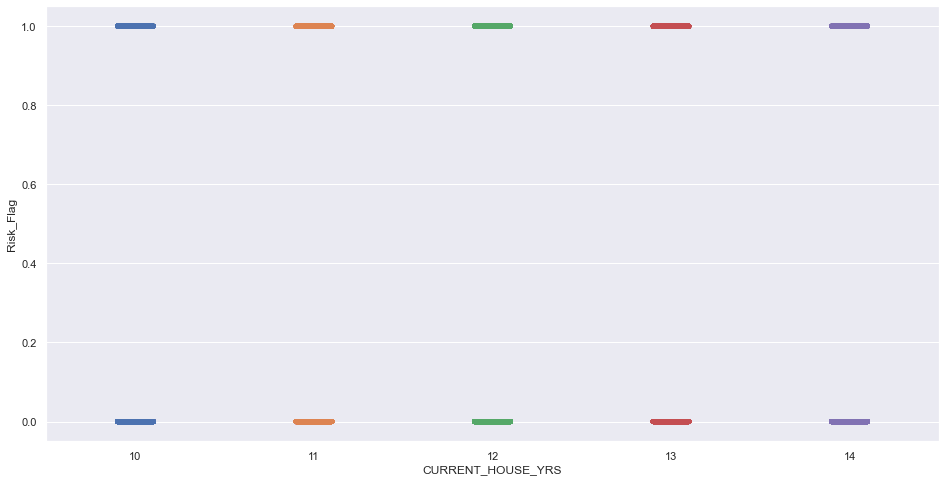

In [39]:
#CURRENT_HOUSE_YEARS and riskFlag
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'CURRENT_HOUSE_YRS', y = 'Risk_Flag', data = riskData)